In [45]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [46]:
rootdir = 'data/papers'
contents = []
i = 0
source = []
errors = []
doc = []
year = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                doc.append(path.split('_')[1][:3])
                year.append(int(path.split('/')[-1][6:10]))
                try:
                    text = file.read()
                    if len(text)> 10 :
                        contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [47]:
#contents_method_ref = [content[content.find('Methods'):content.find('References')] for content in contents]

In [48]:
count = 0
for i,elem in  enumerate(contents): 
    if elem.find('Methods') == -1 & elem.find('Method') == -1 & elem.find('Proceedings')==-1& elem.find('Procedure')==-1: 
        print(doc[i],i)
        count = count+1 
         #elem.find('Context and methods') == -1
        
        

166 44
500 240
50. 249
300 329
248 343
100 395
312 442
285 462
122 546
283 556
121 595
60. 612


In [49]:
def find_methodology(elem): 
    new = ''
    ind = elem.find('Methods')
    end = elem.find('References')
    if ind != -1 :
        new = elem[ind:end-10]
    else :
        if elem.find('Method') != -1: 
            ind = elem.find('Method')
            new = elem[ind:end-10]
        else :
            if elem.find('Proceedings') != -1: 
                ind = elem.find('Proceedings')
                new = elem[ind:end-10]
            else :
                if elem.find('Procedure') != -1 : 
                    ind = elem.find('Procedure')
                    new = elem[ind:end-10]
          
    return new


In [50]:
tmp = pd.DataFrame(contents)

In [51]:
#drop the malformed texts
tmp.drop(8,inplace = True)

In [52]:
tmp[0] = tmp[0].apply(lambda x : find_methodology(x))

In [53]:
tmp[0][0][:-1]

'Methods\r\rThis study took place inside a genetics lab embedded within an exhibit on the human body in a large natural\rhistory museum in the Western U. S. The work of the community scientists who volunteer in this lab is directed\ron a day-to-day basis by a lab manager and three museum staff members. The community scientists in the lab\rare responsible for daily maintenance tasks related to the exhibit-associated experiment area as well as enrolling\rmuseum guests in ongoing genetics studies and other study-related tasks.\rWe took an ethnographic approach, engaging the first and second author in participant observations of\rlab operations. The researchers participated in the normal onboarding process for all museum volunteers. Over\rthe course of 16 months, they completed 52 observations (>156 hours) across all 14 volunteer shifts. All\rcommunity scientist volunteers were asked to consent to being observed while working in the lab, with a\rpurposive sub-sample asked to participate in

In [54]:
def termination (x):
    end = -1
    if elem.find('Findings') == -1: 
        end = elem.find('Findings') 
    else :
        if elem.find('Result')==-1:
            end = elem.find('Result')
        else :
            if elem.find('Anticipated results')==-1:
                end = elem.find('Anticipated results')
            else: 
                if elem.find('Validation results') == -1:
                    end = elem.find('Validation results')
                else :
                    if elem.find('Major findings') == -1:
                        end = elem.find('Major findings')
                    else :
                        if elem.find('Outcomes') == -1: 
                            end = elem.find('Outcomes')
                        else :
                            if elem.find('Conclusions') == -1: 
                                end = elem.find('Conclusions')
    return x[:end]

In [55]:
count = 0
for i,elem in enumerate(tmp[0]):
    if elem.find('Findings') == -1 & elem.find('Results') == -1 & elem.find('Result')==-1 & elem.find('Anticipated results')==-1 & elem.find('Validation results') == -1 & elem.find('Major findings') == -1 & elem.find('Outcomes') == -1 &elem.find('Conclusions') == -1:
        count = count+1

In [56]:
tmp[0] = tmp[0].apply(lambda x : termination(x))

In [57]:
#clean text 
tmp[0] = tmp[0].apply(lambda x : x.replace('Methods\r\r','').replace('\r','').replace('Methods','').replace('Method','').replace('Proceedings','').replace('isls',' isls '))

In [58]:
import string
printable = set(string.printable)


In [59]:
tmp[0] = tmp[0].apply(lambda y : filter(lambda x: x in printable, y))

In [93]:
tmp[0][0]

'This study took place inside a genetics lab embedded within an exhibit on the human body in a large naturalhistory museum in the Western U. S. The work of the community scientists who volunteer in this lab is directedon a day-to-day basis by a lab manager and three museum staff members. The community scientists in the labare responsible for daily maintenance tasks related to the exhibit-associated experiment area as well as enrollingmuseum guests in ongoing genetics studies and other study-related tasks.We took an ethnographic approach, engaging the first and second author in participant observations oflab operations. The researchers participated in the normal onboarding process for all museum volunteers. Overthe course of 16 months, they completed 52 observations (>156 hours) across all 14 volunteer shifts. Allcommunity scientist volunteers were asked to consent to being observed while working in the lab, with apurposive sub-sample asked to participate in interviews. For analytic pur

In [60]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

import warnings

stemmer = SnowballStemmer('english')

def review_to_words( raw_methodology ):

    # Remove HTML
    review_text = BeautifulSoup(raw_methodology).get_text() 
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
     
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    
    # Stem words
    #stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    # Join the words back into one string separated by space and return the result
    return( " ".join( meaningful_words ))

In [61]:
clean_txt = tmp[0].apply(review_to_words)

In [62]:
clean_txt = clean_txt[clean_txt!= '']

In [91]:
clean_txt[:10]

0     study took place inside genetics lab embedded ...
1     data collected public schools two u states par...
2     participants study students intact th th th gr...
3     islssadik built fort sticks built play friends...
4     participants designthe study implemented two w...
5     study adopted embodied cognitive theoretical p...
6     ologygenie six week middle school unit include...
7     study builds approaches seeking broaden concep...
9     research contextthe data analysis come eight y...
10    participantsparticipants undergraduates second...
Name: 0, dtype: object

In [64]:
titles = [content[:content.find('\r')] for content in contents ]
titles = pd.DataFrame(titles)

In [65]:
titles = titles.iloc[clean_txt.index]

In [66]:
titles[0] = titles[0].apply(lambda y : filter(lambda x: x in printable, y))

In [67]:
len(titles)

811

In [68]:
# apply a TFIDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1500,ngram_range=(1,3))
features = vectorizer.fit_transform(clean_txt)
features = features.toarray()

In [69]:
# Method for loading a text file in a DataFrame (each row corresponds to a line)
def load_data(path):
    with open(path) as file:
        words_file = pd.DataFrame([line.rstrip() for line in file])
    return words_file

In [70]:
# Method to load glove vectors from glove.6B, which is a file from stanford containing pre-trained glove vectors on
# wikipedia, which is more appropriate in our case than twitter glove vectors even if it contains less words than for twitter.
def load_glove(path,n =100,):
    """Loading glove vectors
    n is the dimension of the vectors, can be 50, 100, 200 or 300"""
    glove_vectors_100 = load_data(path)
    glove_vectors_100[0] = glove_vectors_100[0].apply(lambda x : x.split(' ',1))
    words = pd.DataFrame(glove_vectors_100[0].apply(lambda x : x[0]))
    words['Vectors']= glove_vectors_100[0].apply(lambda x : x[1])
    del(glove_vectors_100)
    words.rename(columns={0:'Words'},inplace=True)
    words['Words'] = words.apply(lambda x : [elem.replace('<','').replace('>','') for elem in x ])
    words.set_index('Words',inplace=True)
    return words

In [71]:
#load the vectors downloaded before with your path
path = '/Users/Nourghaliaabassi/Desktop/glove.6B.100d.txt'
csv_glove = load_glove(path)

In [72]:
csv_glove['Vectors'] = csv_glove['Vectors'].apply(lambda x : [float(x) for x in x.split()])


In [73]:
dict_of_words_vect = csv_glove.to_dict()['Vectors']


In [74]:
indices = features.nonzero()

In [75]:
indices

(array([  0,   0,   0, ..., 810, 810, 810]),
 array([   1,   10,   15, ..., 1487, 1489, 1491]))

In [76]:
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}


In [77]:
doc_vectors = []
ind = 0
avg = np.zeros(100)
count = 0
for i,j in zip(indices[0],indices[1]):
    if i == ind : 
        try :
            #print(dict_of_words_vect[str(inv_map[j])])
            
            avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j])])
            count = count +1 
        except KeyError:
            if len(str(inv_map[j]).split())>1: 
                try :
                    avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j]).split()[0]])
                    avg = avg + features[i,j] *np.array(dict_of_words_vect[str(inv_map[j]).split()[1]])
                    count = count +1 
                except KeyError:
                    continue
            else :
                continue
    else : 
        doc_vectors.append(avg)
        ind = i
        count = 0
        try : 
            avg = np.zeros(100) + features[i,j]* np.array(dict_of_words_vect[str(inv_map[j])])
            count = count +1 
        except KeyError:
            avg = np.zeros(100)
doc_vectors.append(avg)

In [78]:
len(doc_vectors)

811

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_scaled_glove = StandardScaler().fit_transform(doc_vectors)


pca_glove = PCA(n_components=50)

features_pca_glove = pca_glove.fit_transform(features_scaled_glove)

### Kmeans

In [80]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter

def see_clusters(X,range_n_clusters):
    silhouette = []
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        silhouette.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette, range_n_clusters

For n_clusters = 2 The average silhouette_score is : 0.15431419264565888
For n_clusters = 3 The average silhouette_score is : 0.08905677893116509
For n_clusters = 4 The average silhouette_score is : 0.08489778648318569
For n_clusters = 5 The average silhouette_score is : 0.0833178564613697
For n_clusters = 6 The average silhouette_score is : 0.07275392135325898
For n_clusters = 7 The average silhouette_score is : 0.07123423823061009
For n_clusters = 10 The average silhouette_score is : 0.0671663261755407
For n_clusters = 15 The average silhouette_score is : 0.062434079553166176


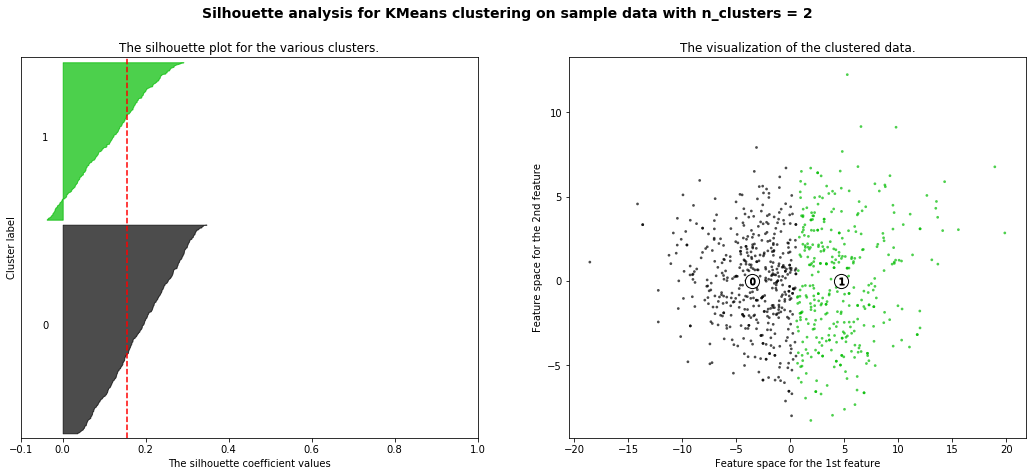

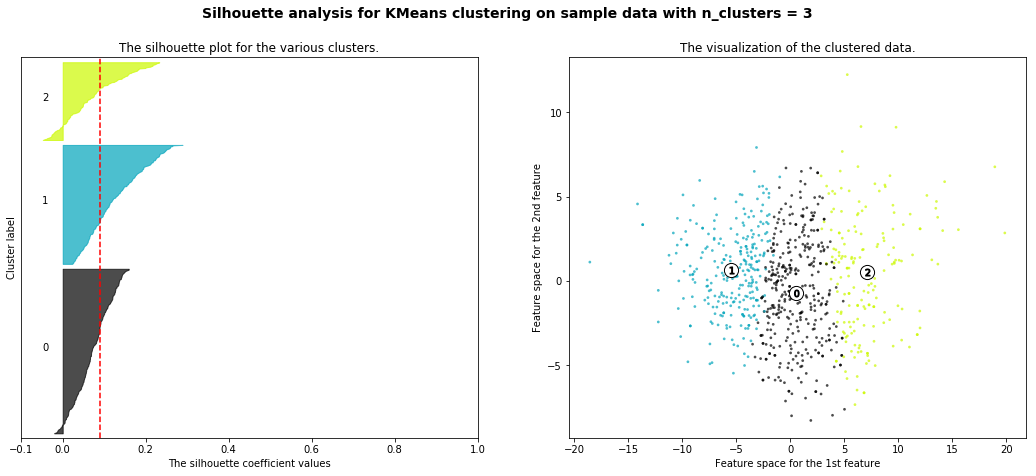

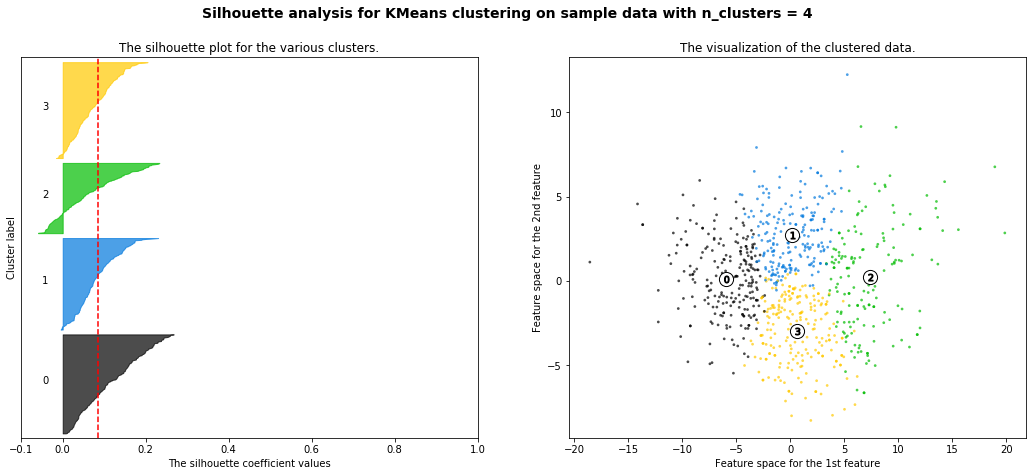

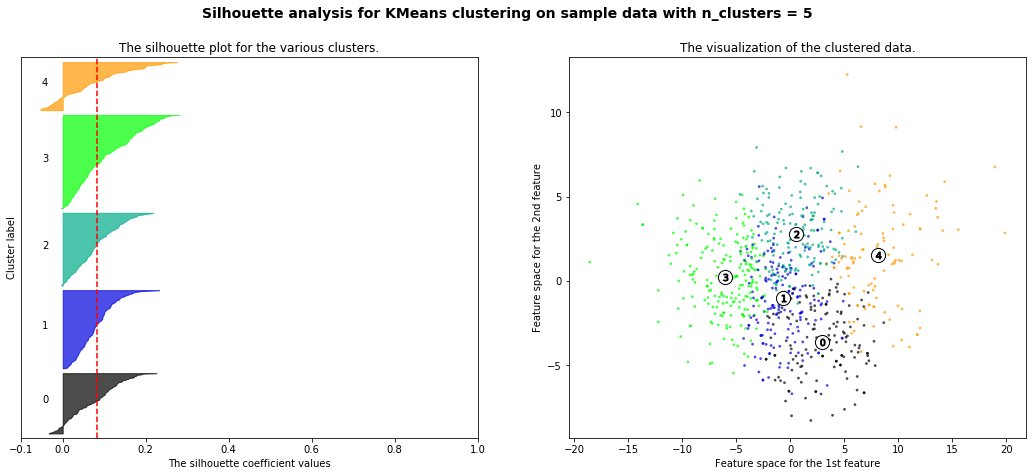

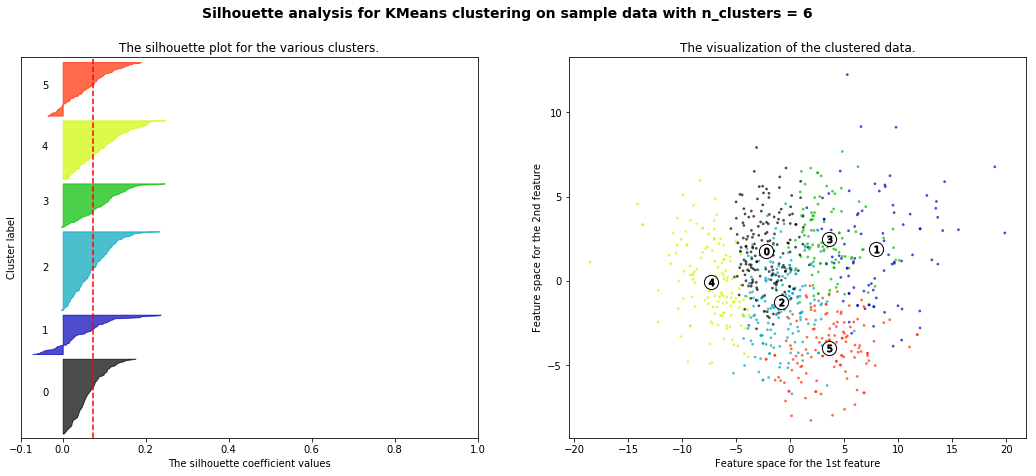

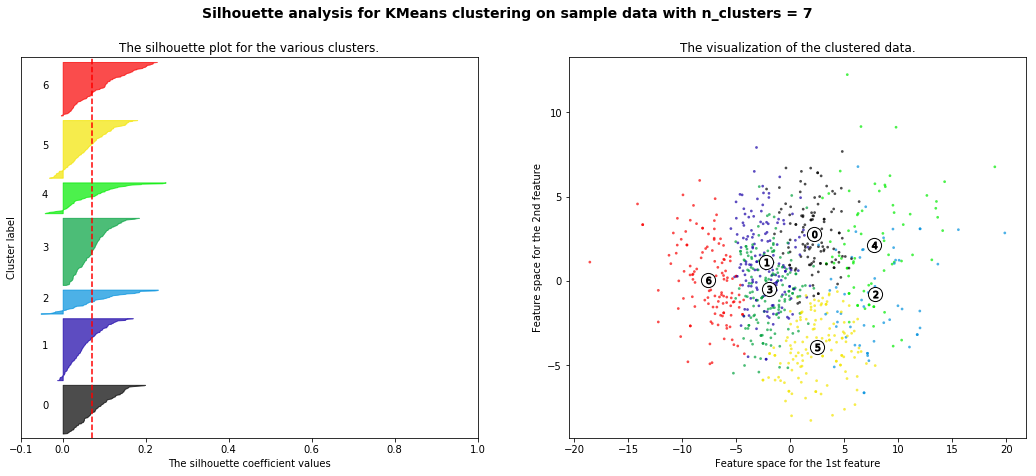

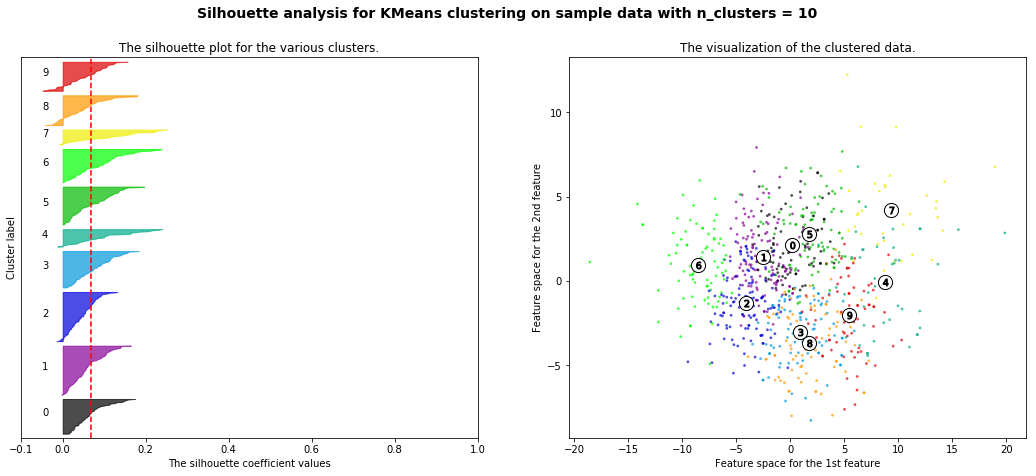

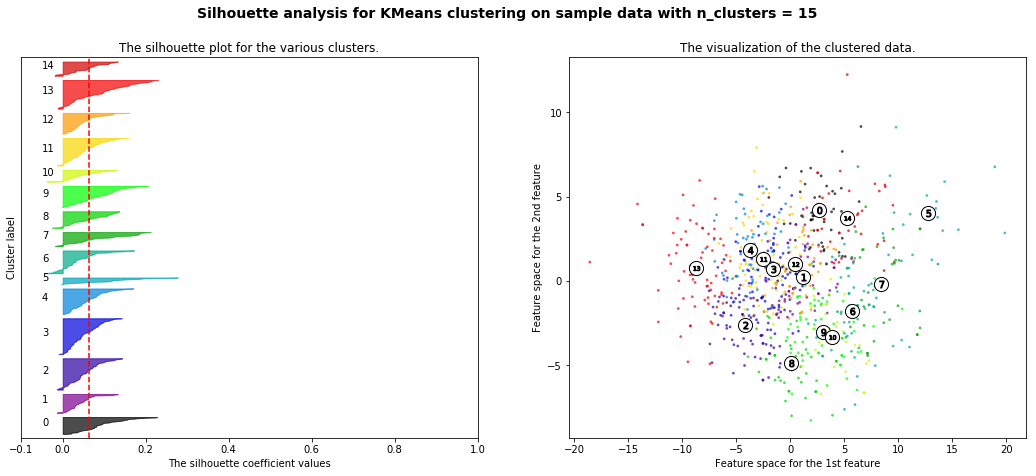

([0.15431419264565888,
  0.08905677893116509,
  0.08489778648318569,
  0.0833178564613697,
  0.07275392135325898,
  0.07123423823061009,
  0.0671663261755407,
  0.062434079553166176],
 [2, 3, 4, 5, 6, 7, 10, 15])

In [81]:
see_clusters(features_pca_glove,[2,3,4,5,6,7,10,15])

In [82]:
import matplotlib as mpl
from sklearn.manifold import MDS

def plot_cos_dist_clust(X,clusters):
    MDS()
    dist = 1 - cosine_similarity(X)

    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]
    %matplotlib inline 

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters,title=np.array(titles)[np.array(titles)!=''])) 

    #group by cluster
    groups = df.groupby('label')


    # set up plot
    fig, ax = plt.subplots(figsize=(60, 40)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                 color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  


    plt.savefig('clusters_methodology.png')
    plt.show() #show the plot
    
    return 

In [83]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#000000',6 : '#0000FF' }


In [84]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
%time km.fit(features_pca_glove)
clusters = km.labels_.tolist()

CPU times: user 326 ms, sys: 4.52 ms, total: 331 ms
Wall time: 84.2 ms


/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:51: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


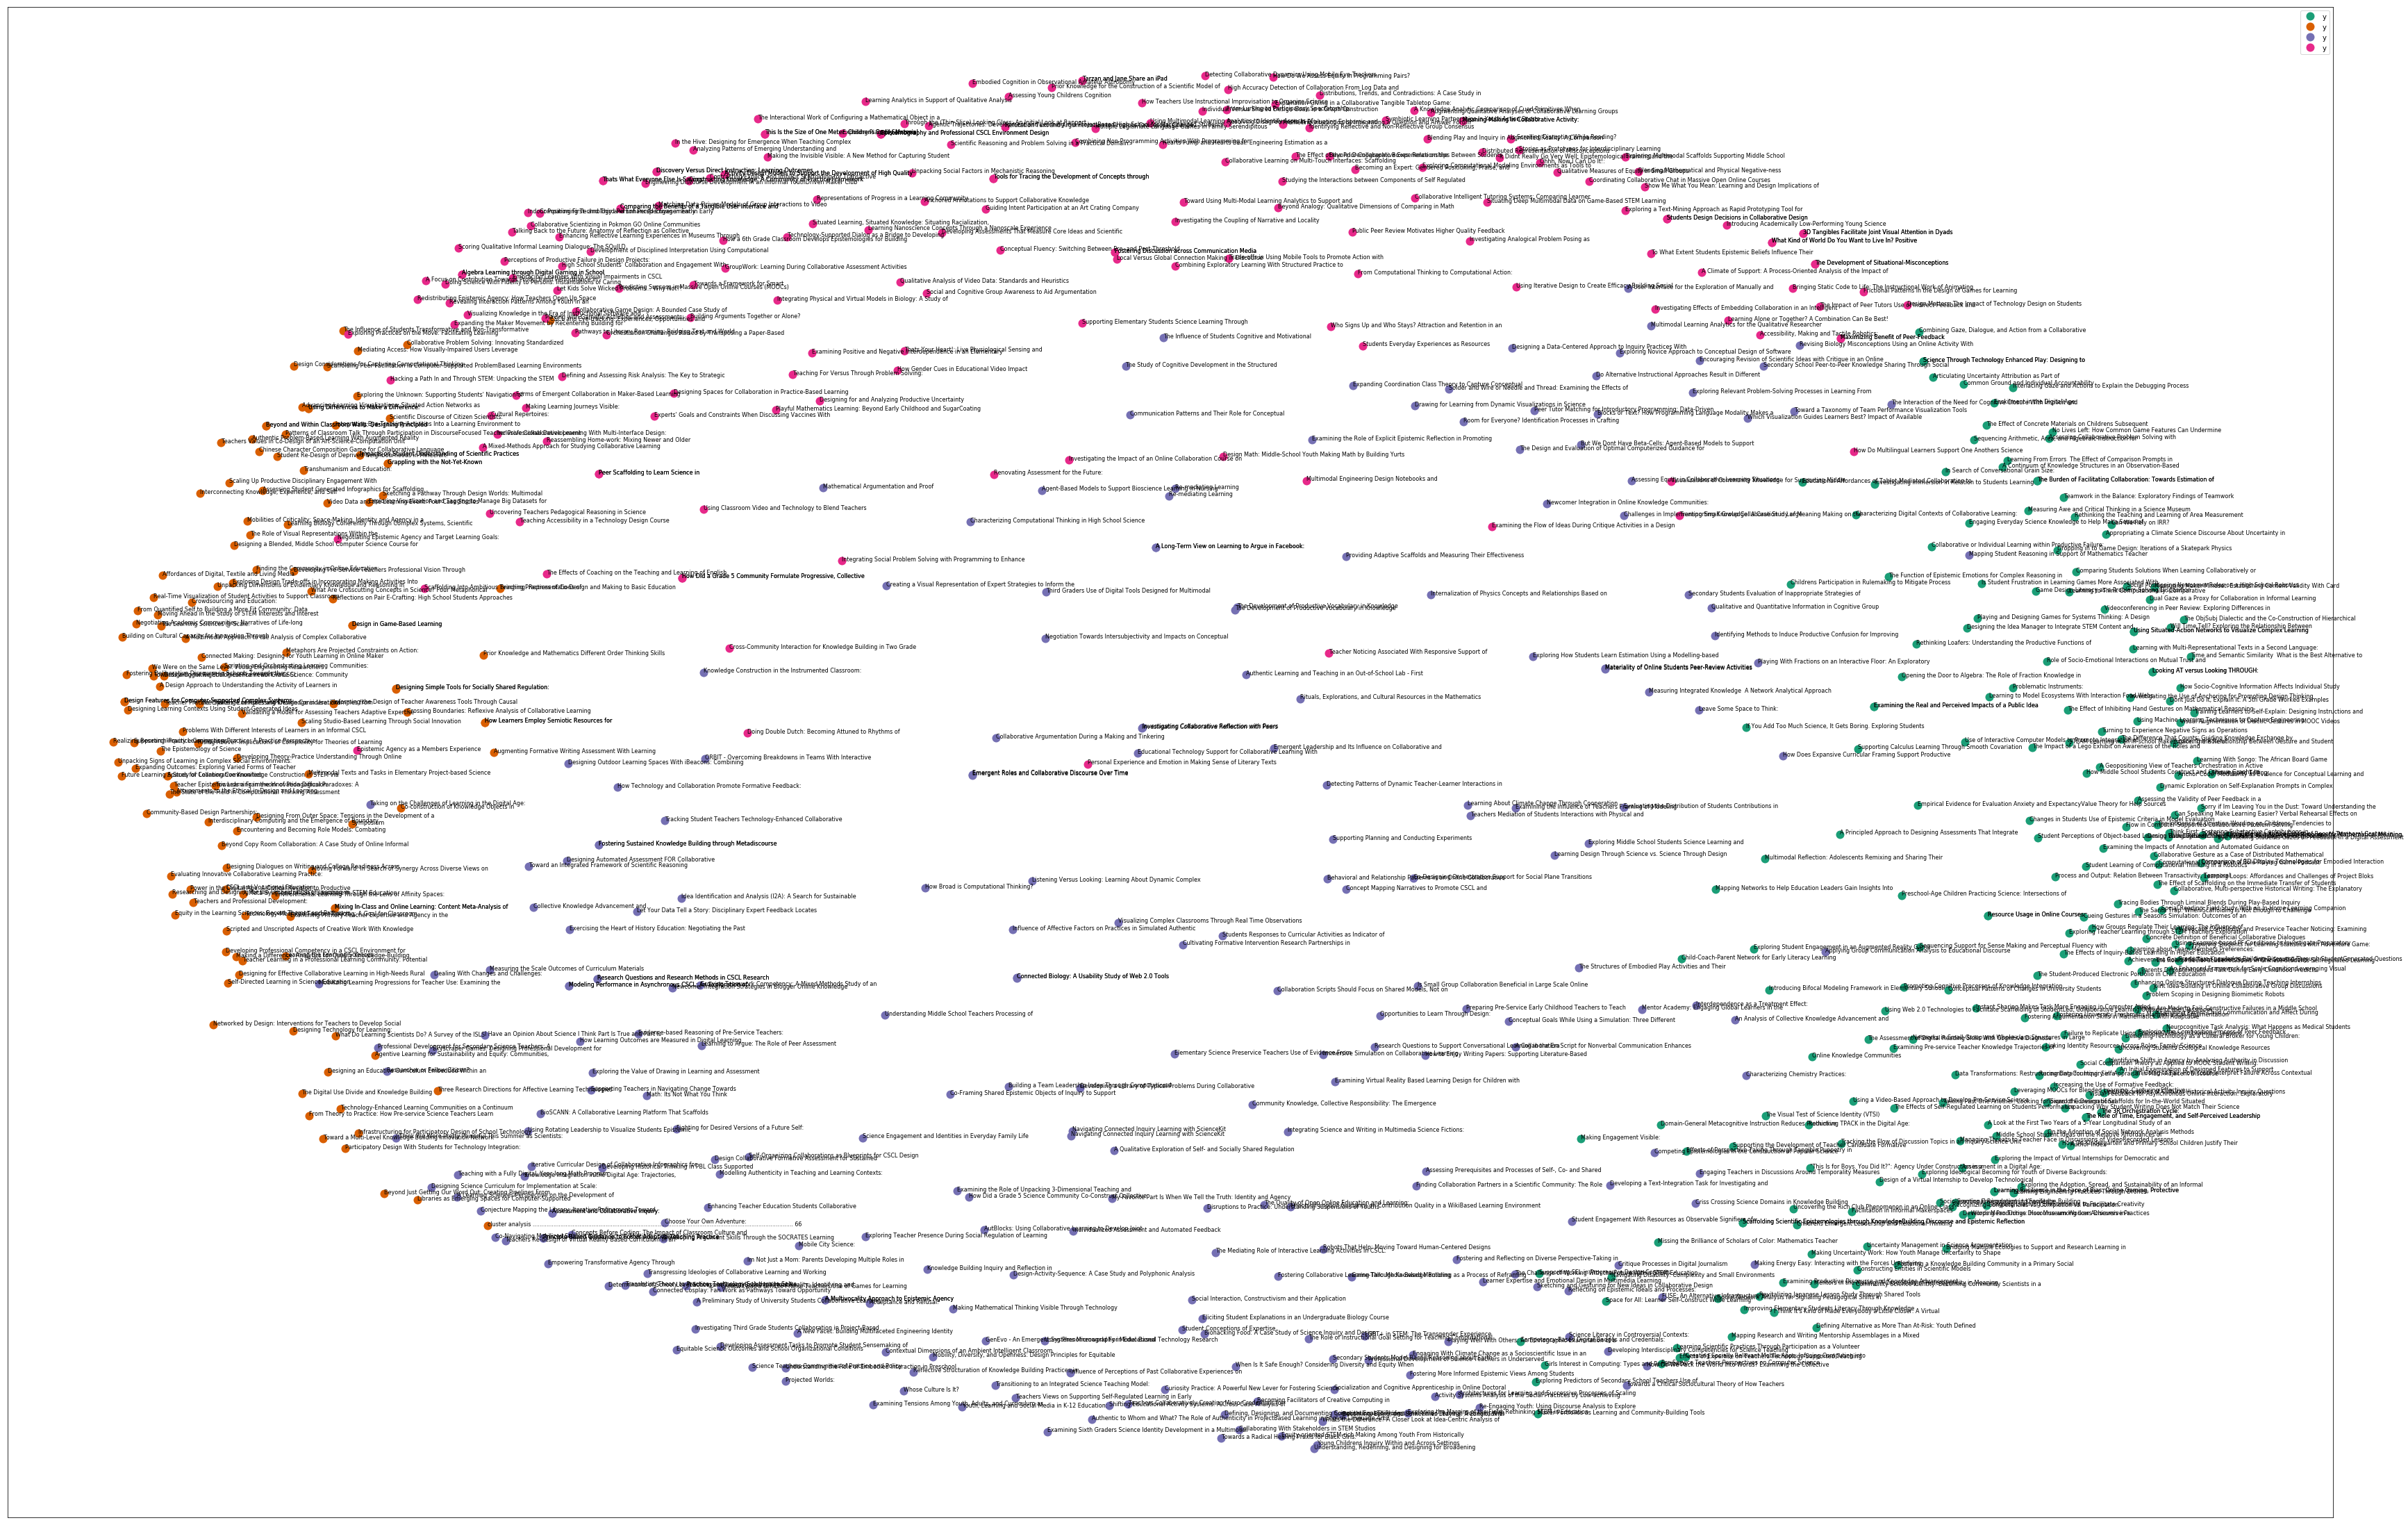

In [85]:
plot_cos_dist_clust(features_pca_glove,clusters)

In [86]:
methodology_cluster = pd.DataFrame(zip(list(titles[0]),clusters))

In [87]:
methodology_cluster.rename(columns={1:'clusters',0:'titles'},inplace=True)

In [89]:
methodology_cluster.groupby(clusters).get_group(1).head()

,titles,clusters
7,Expanding Outcomes: Exploring Varied Forms of ...,1
10,Evaluating Innovative Collaborative Learning P...,1
16,CSCL and Vocational Education:,1
19,Negotiating Academic Communities: Narratives o...,1
20,Moving Ahead in the Study of STEM Interests an...,1
